In [1]:
'''
시계열 multi
'''

'\n시계열 multi\n'

In [2]:
import pandas as pd
from statsmodels.datasets import macrodata
raw_df = macrodata.load_pandas().data
raw_df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [3]:
df = raw_df.copy()

# 날짜 인덱스 생성
year = df['year']
quarter = df['quarter']
dates = pd.period_range(start='1959Q1', periods=len(df), freq='Q')
df.index = dates
df = df.drop(columns=['year', 'quarter'])
df

,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959Q1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959Q2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959Q3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959Q4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960Q1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...
2008Q3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008Q4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009Q1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009Q2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [4]:
y = df['realgdp']  # 타겟: 실질 GDP
X = df.drop(columns='realgdp')  # 외생변수: 나머지 변수

In [5]:
train_size = int(len(df) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]
X_train, X_test = X[:train_size], X[train_size:]

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(
    y_train,
    exog=X_train,
    order=(1, 1, 1),  # 임시값, AIC로 튜닝 가능
    enforce_stationarity=False,
    enforce_invertibility=False
).fit()

print(model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.29501D+00    |proj g|=  9.94090D-01

At iterate    5    f=  4.17093D+00    |proj g|=  6.42791D-02

At iterate   10    f=  4.16953D+00    |proj g|=  1.21503D-02

At iterate   15    f=  4.16509D+00    |proj g|=  8.69841D-02

At iterate   20    f=  4.15499D+00    |proj g|=  4.50335D-02

At iterate   25    f=  4.15428D+00    |proj g|=  1.26339D-02

At iterate   30    f=  4.15373D+00    |proj g|=  2.02177D-03

At iterate   35    f=  4.15368D+00    |proj g|=  3.97971D-03

At iterate   40    f=  4.15315D+00    |proj g|=  1.19888D-02

At iterate   45    f=  4.15308D+00    |proj g|=  2.07414D-03

At iterate   50    f=  4.15296D+00    |proj g|=  1.45842D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
/opt/homebrew/anaconda3/envs/general/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [7]:
# 예측 시점 범위 설정
start = y_test.index[0]
end = y_test.index[-1]

# 예측
pred_y = model.predict(start=start, end=end, exog=X_test)

In [8]:
_y_train = y_train.copy()
_y_train.index = _y_train.index.to_timestamp()

_y_test = y_test.copy()
_y_test.index = _y_test.index.to_timestamp()

_pred_y = pred_y.copy()
_pred_y.index = _pred_y.index.to_timestamp()

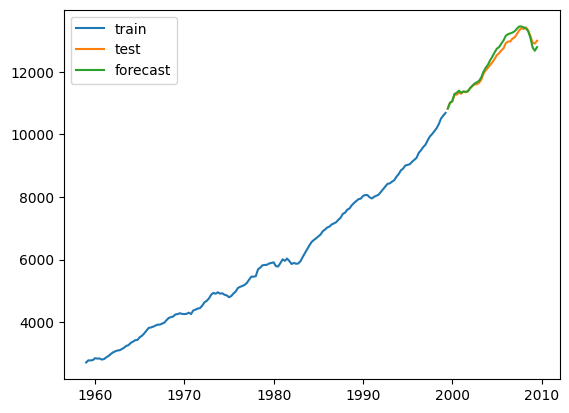

In [9]:
# 예측
pred_y = model.predict(start=y_test.index[0], end=y_test.index[-1], exog=X_test)

# 시각화
import matplotlib.pyplot as plt
plt.plot(_y_train, label='train')
plt.plot(_y_test, label='test')
plt.plot(_pred_y, label='forecast')
plt.legend()
plt.show()